In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
import pandas as pd

housing_data = pd.read_csv('housing_data.csv')
print(housing_data.head())

         date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london          91449  E09000001         17.0   
1  1995-02-01  city of london          82203  E09000001          7.0   
2  1995-03-01  city of london          79121  E09000001         14.0   
3  1995-04-01  city of london          77101  E09000001          7.0   
4  1995-05-01  city of london          84409  E09000001         10.0   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1  


In [5]:
print(housing_data.info())
print(housing_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
 6   borough_flag   13549 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 741.1+ KB
None
       average_price    houses_sold  no_of_crimes  borough_flag
count   1.354900e+04   13455.000000   7439.000000  13549.000000
mean    2.635197e+05    3893.994129   2158.352063      0.733338
std     1.876175e+05   12114.402476    902.087742      0.442230
min     4.072200e+04       2.000000      0.000000      0.000000
25%     1.323800e+05     247.000000   1623.000000      0.000000
50%     2.229190e+05     371.000000   2132.

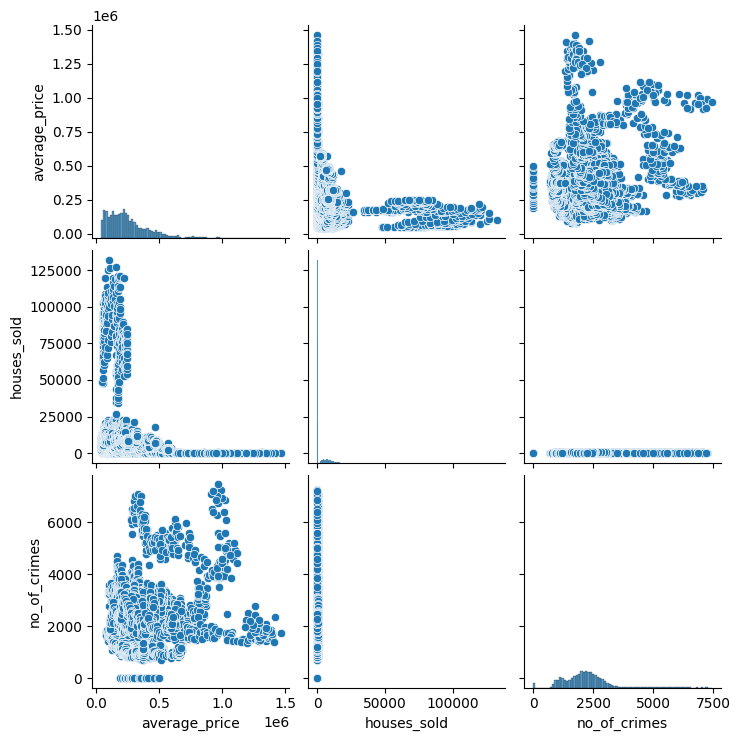

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(housing_data[['average_price', 'houses_sold', 'no_of_crimes']])
plt.show()


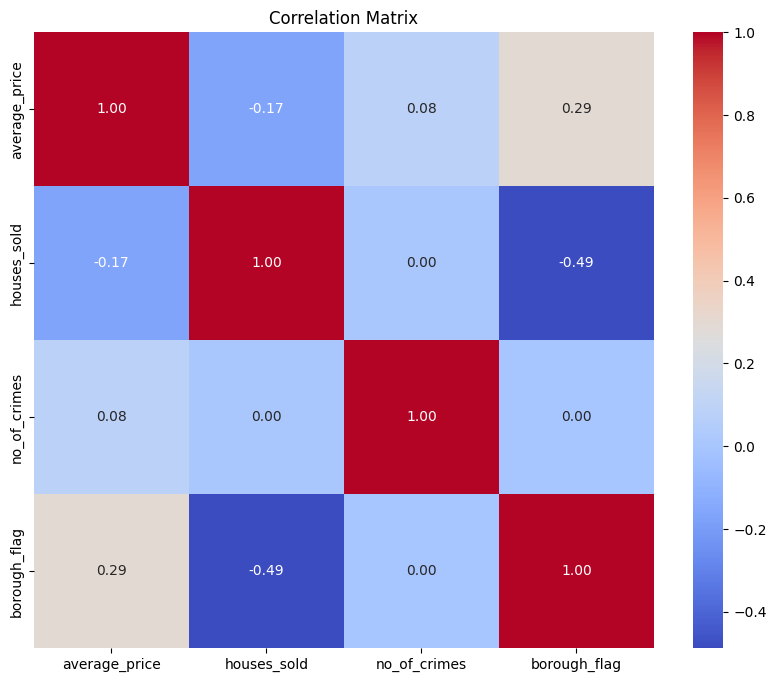

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns for correlation calculation
numerical_columns = housing_data.select_dtypes(include='number').columns.tolist()

# Calculate the correlation matrix using numerical columns
correlation_matrix = housing_data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


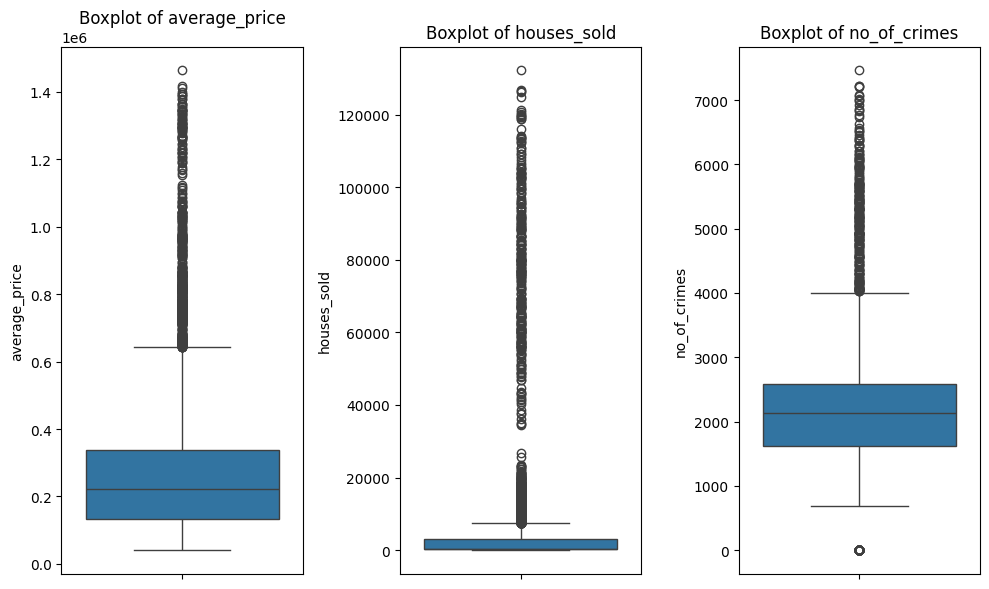

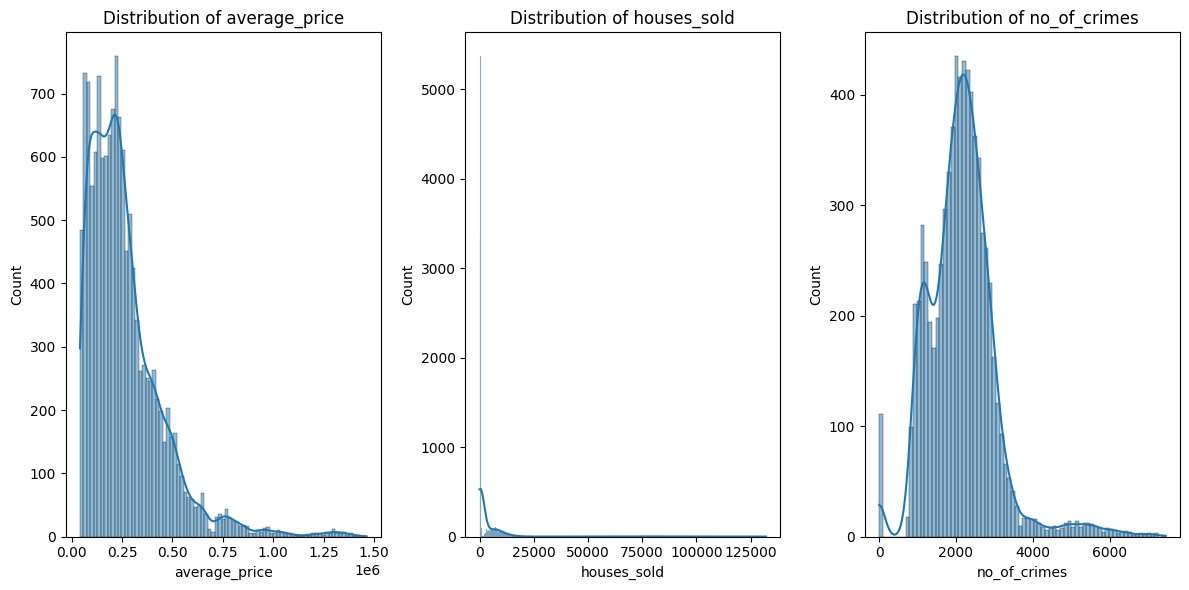

In [9]:
plt.figure(figsize=(10, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=housing_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(housing_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


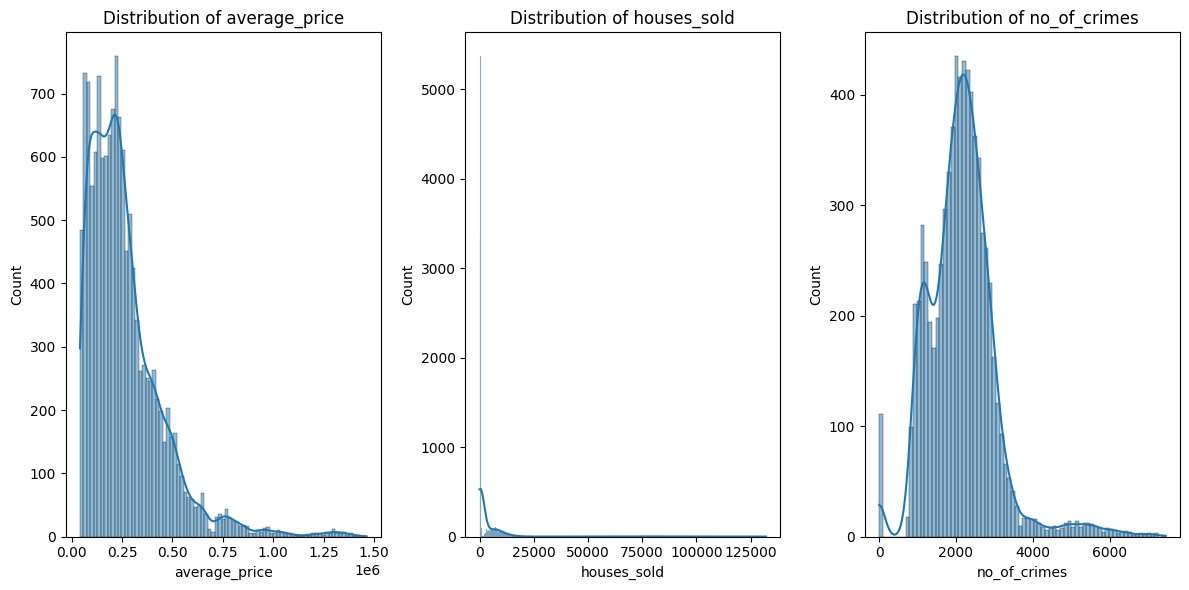

In [10]:
# Visualize distributions of numerical columns
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(housing_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


In [14]:

encoded_data = pd.get_dummies(housing_data, columns=['area', 'borough_flag'])
print(encoded_data.head())


         date  average_price       code  houses_sold  no_of_crimes  \
0  1995-01-01       0.035657  E09000001     0.000113           NaN   
1  1995-02-01       0.029157  E09000001     0.000038           NaN   
2  1995-03-01       0.026991  E09000001     0.000091           NaN   
3  1995-04-01       0.025571  E09000001     0.000038           NaN   
4  1995-05-01       0.030708  E09000001     0.000061           NaN   

   area_barking and dagenham  area_barnet  area_bexley  area_brent  \
0                      False        False        False       False   
1                      False        False        False       False   
2                      False        False        False       False   
3                      False        False        False       False   
4                      False        False        False       False   

   area_bromley  ...  area_southwark  area_sutton  area_tower hamlets  \
0         False  ...           False        False               False   
1         Fa

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'average_price', 'houses_sold', and 'no_of_crimes' need scaling
columns_to_scale = ['average_price', 'houses_sold', 'no_of_crimes']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(housing_data[columns_to_scale])
housing_data[columns_to_scale] = scaled_data
print(housing_data.head())


         date            area  average_price       code  houses_sold  \
0  1995-01-01  city of london       0.035657  E09000001     0.000113   
1  1995-02-01  city of london       0.029157  E09000001     0.000038   
2  1995-03-01  city of london       0.026991  E09000001     0.000091   
3  1995-04-01  city of london       0.025571  E09000001     0.000038   
4  1995-05-01  city of london       0.030708  E09000001     0.000061   

   no_of_crimes  borough_flag  
0           NaN             1  
1           NaN             1  
2           NaN             1  
3           NaN             1  
4           NaN             1  


In [22]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

numerical_columns = ['average_price', 'houses_sold', 'no_of_crimes']

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
housing_data[numerical_columns] = imputer.fit_transform(housing_data[numerical_columns])

# Apply PCA on imputed numerical columns
pca = PCA(n_components=3)  # Specify number of components
pca_result = pca.fit_transform(housing_data[numerical_columns])
housing_data_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

print(housing_data_pca.head())  # Output the transformed data


        PC1       PC2       PC3
0 -0.111801 -0.029458 -0.046068
1 -0.118115 -0.029995 -0.047513
2 -0.120236 -0.030119 -0.047940
3 -0.121608 -0.030261 -0.048281
4 -0.116610 -0.029863 -0.047165


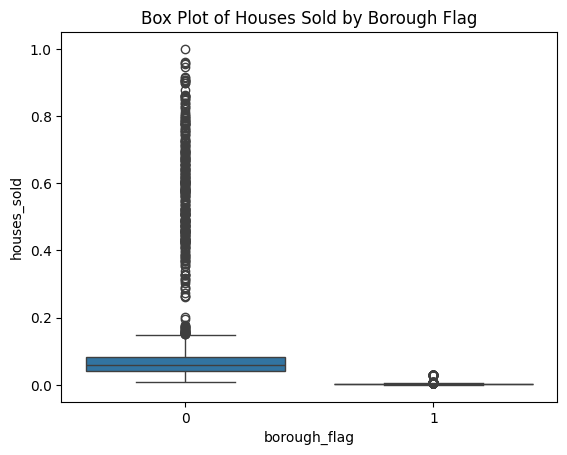

In [27]:
sns.boxplot(x='borough_flag', y='houses_sold', data=housing_data)
plt.title('Box Plot of Houses Sold by Borough Flag')
plt.show()


In [28]:
# Checking for missing values
missing_values = housing_data.isnull().sum()
print("Missing Values:\n", missing_values)

# Checking for duplicated rows
duplicates = housing_data.duplicated().sum()
print("\nNumber of Duplicated Rows:", duplicates)

# Checking for outliers or unrealistic values
# You might define certain thresholds or use domain knowledge to identify bad data

# Summary statistics to identify outliers
summary_statistics = housing_data.describe()
print("\nSummary Statistics:\n", summary_statistics)

# Checking for unique values in categorical columns
categorical_columns = housing_data.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    unique_values = housing_data[col].unique()
    print(f"\nUnique values in '{col}':\n", unique_values)


Missing Values:
 date             0
area             0
average_price    0
code             0
houses_sold      0
no_of_crimes     0
borough_flag     0
dtype: int64

Number of Duplicated Rows: 0

Summary Statistics:
        average_price   houses_sold  no_of_crimes  borough_flag
count   13549.000000  13549.000000  13549.000000  13549.000000
mean        0.156607      0.029449      0.289285      0.733338
std         0.131878      0.091345      0.089586      0.442230
min         0.000000      0.000000      0.000000      0.000000
25%         0.064427      0.001861      0.275164      0.000000
50%         0.128068      0.002807      0.289285      1.000000
75%         0.208147      0.025461      0.296207      1.000000
max         1.000000      1.000000      1.000000      1.000000

Unique values in 'date':
 ['1995-01-01' '1995-02-01' '1995-03-01' '1995-04-01' '1995-05-01'
 '1995-06-01' '1995-07-01' '1995-08-01' '1995-09-01' '1995-10-01'
 '1995-11-01' '1995-12-01' '1996-01-01' '1996-02-01' '1996-

In [29]:
import pandas as pd

# Convert 'date' column to datetime format
housing_data['date'] = pd.to_datetime(housing_data['date'])

# Check consistency between 'code' and 'area' columns
code_area_check = housing_data.groupby('code')['area'].nunique()
inconsistent_entries = code_area_check[code_area_check > 1]
if len(inconsistent_entries) > 0:
    print("Inconsistent 'code' and 'area' entries:", inconsistent_entries)

# Feature engineering from 'date' column (e.g., extracting month, year)
housing_data['year'] = housing_data['date'].dt.year
housing_data['month'] = housing_data['date'].dt.month

# Outlier detection and handling - perform based on domain knowledge
# Scaling/Normalization of numerical columns if required

# Display the modified DataFrame
print(housing_data.head())


Inconsistent 'code' and 'area' entries: code
E09000010    2
E09000012    2
E09000030    2
E12000008    2
Name: area, dtype: int64
        date            area  average_price       code  houses_sold  \
0 1995-01-01  city of london       0.035657  E09000001     0.000113   
1 1995-02-01  city of london       0.029157  E09000001     0.000038   
2 1995-03-01  city of london       0.026991  E09000001     0.000091   
3 1995-04-01  city of london       0.025571  E09000001     0.000038   
4 1995-05-01  city of london       0.030708  E09000001     0.000061   

   no_of_crimes  borough_flag  year  month  
0      0.289285             1  1995      1  
1      0.289285             1  1995      2  
2      0.289285             1  1995      3  
3      0.289285             1  1995      4  
4      0.289285             1  1995      5  


In [30]:
# Find the conflicting entries between 'code' and 'area'
conflicting_entries = housing_data.groupby('code')['area'].nunique()
conflicts = conflicting_entries[conflicting_entries > 1]
if len(conflicts) > 0:
    for code in conflicts.index:
        unique_areas = housing_data[housing_data['code'] == code]['area'].unique()
        print(f"Conflicting areas for code {code}: {unique_areas}")
        # Assuming you want to choose the first area encountered for each code
        chosen_area = unique_areas[0]
        housing_data.loc[housing_data['code'] == code, 'area'] = chosen_area

# Verify that the conflicts have been resolved
conflicting_entries_after_fix = housing_data.groupby('code')['area'].nunique()
conflicts_after_fix = conflicting_entries_after_fix[conflicting_entries_after_fix > 1]
if len(conflicts_after_fix) == 0:
    print("Conflicts resolved. Unique 'area' for each 'code' now.")


Conflicting areas for code E09000010: ['enfield' 'tower hamlets']
Conflicting areas for code E09000012: ['hackney' 'south east']
Conflicting areas for code E09000030: ['enfield' 'tower hamlets']
Conflicting areas for code E12000008: ['hackney' 'south east']
Conflicts resolved. Unique 'area' for each 'code' now.


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

# Assuming 'housing_data' contains your dataset
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(housing_data[['houses_sold', 'average_price', 'area', 'borough_flag']])
# Assuming 'no_of_crimes' is the target variable
y = housing_data['no_of_crimes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    KNeighborsRegressor()
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")


Model: LinearRegression
Mean Squared Error: 0.0032
R2 Score: 0.6270

Model: DecisionTreeRegressor
Mean Squared Error: 0.0010
R2 Score: 0.8770

Model: RandomForestRegressor
Mean Squared Error: 0.0007
R2 Score: 0.9194

Model: GradientBoostingRegressor
Mean Squared Error: 0.0015
R2 Score: 0.8279

Model: SVR
Mean Squared Error: 0.0046
R2 Score: 0.4599

Model: KNeighborsRegressor
Mean Squared Error: 0.0007
R2 Score: 0.9141



In [36]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Assuming 'housing_data' contains your dataset
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(housing_data[['houses_sold', 'average_price', 'area', 'borough_flag']])
# Assuming 'no_of_crimes' is the target variable
y = housing_data['no_of_crimes']

# Initialize the RandomForestRegressor with the best parameters from the previous evaluation
best_model = RandomForestRegressor()

# Train the model on the entire dataset
best_model.fit(X, y)

# Predicting 'no_of_crimes' using the trained model
predictions = best_model.predict(X)

# Adding predictions to the housing_data DataFrame
housing_data['predicted_crimes'] = predictions

# View the housing_data DataFrame with predicted crime rates
print(housing_data)


            date            area  average_price       code  houses_sold  \
0     1995-01-01  city of london       0.035657  E09000001     0.000113   
1     1995-02-01  city of london       0.029157  E09000001     0.000038   
2     1995-03-01  city of london       0.026991  E09000001     0.000091   
3     1995-04-01  city of london       0.025571  E09000001     0.000038   
4     1995-05-01  city of london       0.030708  E09000001     0.000061   
...          ...             ...            ...        ...          ...   
13544 2019-09-01         england       0.147063  E92000001     0.488820   
13545 2019-10-01         england       0.146665  E92000001     0.519631   
13546 2019-11-01         england       0.146060  E92000001     0.513101   
13547 2019-12-01         england       0.147392  E92000001     0.029449   
13548 2020-01-01         england       0.145245  E92000001     0.029449   

       no_of_crimes  borough_flag  year  month  predicted_crimes  
0          0.289285             

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Assuming 'housing_data' contains your dataset
X = pd.get_dummies(housing_data[['houses_sold', 'average_price', 'area', 'borough_flag']])
y = housing_data['no_of_crimes']

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30]  # Maximum depth of the trees
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Estimator:", best_estimator)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Estimator: RandomForestRegressor(max_depth=10)


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'housing_data' contains your dataset
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(housing_data[['houses_sold', 'average_price', 'area', 'borough_flag']])
# Assuming 'no_of_crimes' is the target variable
y = housing_data['no_of_crimes']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor with the best parameters from the previous evaluation
best_model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model on the training dataset
best_model.fit(X_train, y_train)

# Predicting 'no_of_crimes' using the trained model on the test set
predictions = best_model.predict(X_test)

# You can evaluate the model's performance using metrics like Mean Squared Error (MSE) or R-squared
# For example:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 0.0019
R-squared: 0.7734
